In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

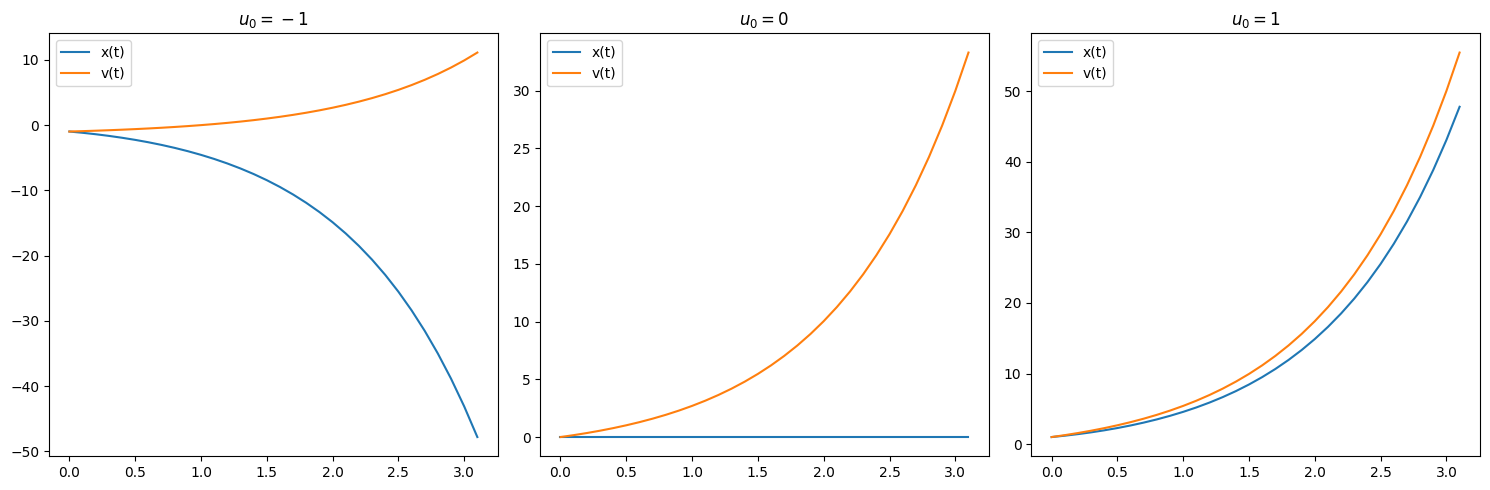

In [3]:
%matplotlib inline
U0 = [-1, 0, 1]
fig, axs = plt.subplots(nrows=1, ncols=3)
for idx, u0 in enumerate(U0):
    C0 = np.log(u0 + np.pi / 2)
    F = lambda t, x: x + np.arctan(x)
    v = lambda t: np.exp(t + C0) - np.pi / 2

    t_eval = np.arange(0, np.pi, 0.1)
    sol = solve_ivp(F, [0, np.pi], [u0], t_eval=t_eval)

    axs[idx].plot(sol.t, sol.y[0], label='x(t)')
    axs[idx].plot(t_eval, v(t_eval), label  = 'v(t)')
    axs[idx].set_title(f'$u_0 = {u0}$')
    axs[idx].legend()
fig.set_size_inches((15, 5))
plt.tight_layout()
plt.savefig('p1.jpeg', dpi=500)

In [4]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )

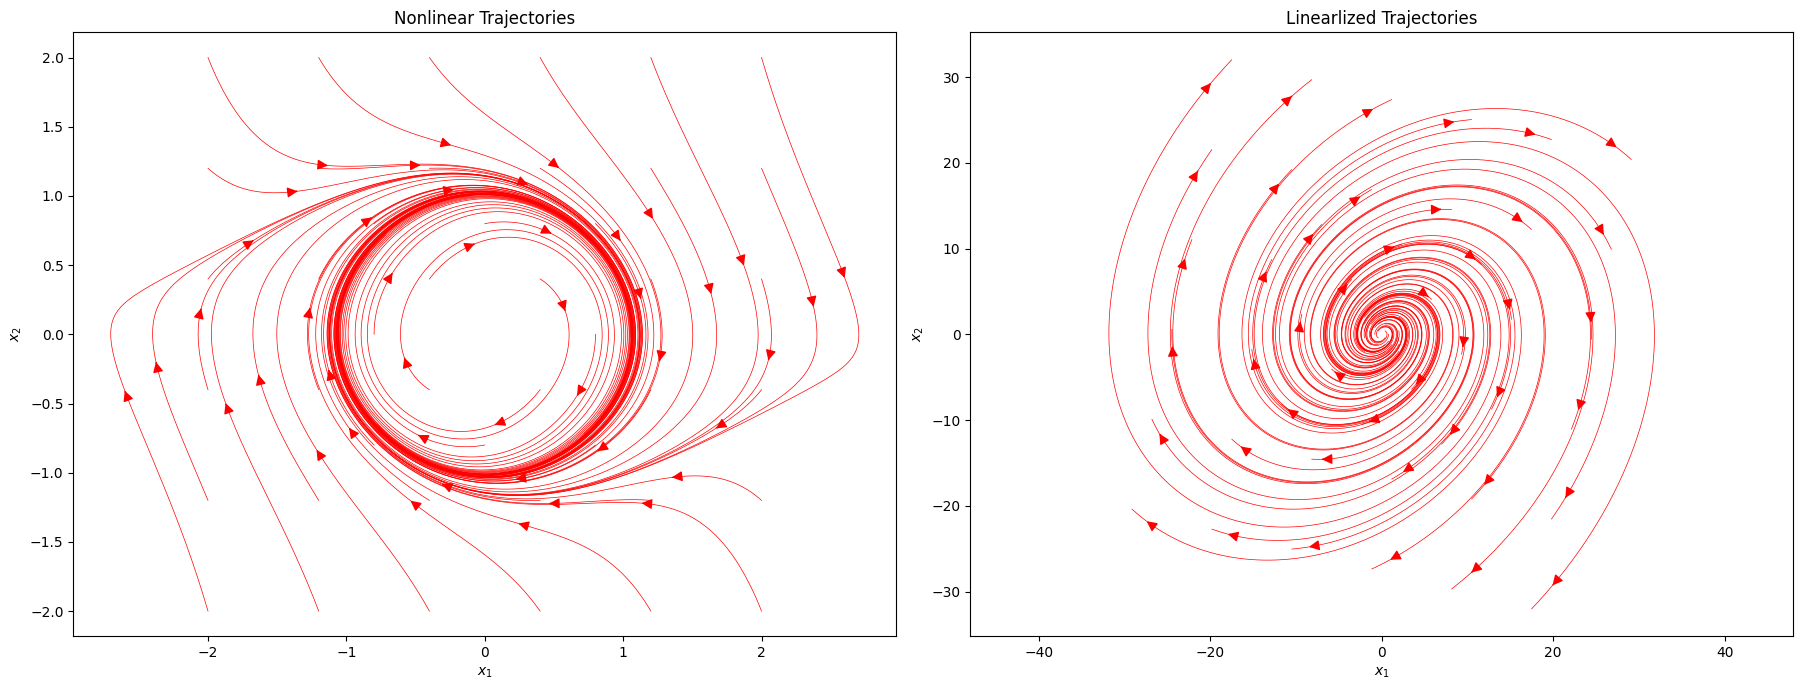

In [5]:
alpha = 1
c = 0.5
F = lambda x1, x2: np.array([x2,
                             -np.sin(x1) - alpha * x2 * (x2**2 / 2 - np.cos(x1) + c)])

fig, axs = plt.subplots(nrows = 1, ncols = 2)
steps = 1000
x = np.zeros((steps,2))
X0 = []
NUM = 6
for a in np.linspace(-2, 2, num=NUM):
    for b in np.linspace(-2, 2, num=NUM):
        X0.append((a,b))

for a in np.linspace(-0.8, 0.8, num=3):
    for b in np.linspace(-0.8, 0.8, num=3):
        X0.append((a,b))
dt = 0.01


for x0 in X0:
    x[0] = np.array(x0)
    for i in range(1, steps):
        x[i] = F(*x[i - 1]) * dt + x[i - 1]
    l, = axs[0].plot(x[:, 0], x[:, 1], color = 'red', lw=0.5)
    # add_arrow(l, position=x[20][0])
    add_arrow(l, position=x[60][0])

axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].set_aspect('equal', adjustable='datalim')
axs[0].set_title('Nonlinear Trajectories')

#---------------

alpha = 1
c = 0.5
F = lambda x1, x2: np.array([[0,1],
                             [-1, alpha - alpha * c]]) @ np.array([x1, x2])

steps = 1000
x = np.zeros((steps,2))
X0 = []
NUM = 6
for a in np.linspace(-2, 2, num=NUM):
    for b in np.linspace(-2, 2, num=NUM):
        X0.append((a,b))
        
for a in np.linspace(-0.8, 0.8, num=3):
    for b in np.linspace(-0.8, 0.8, num=3):
        X0.append((a,b))
dt = 0.01

for x0 in X0:
    x[0] = np.array(x0)
    for i in range(1, steps):
        x[i] = F(*x[i - 1]) * dt + x[i - 1]
    l, = axs[1].plot(x[:, 0], x[:, 1], color = 'red', lw=0.5)
    # add_arrow(l, position=x[20][0])
    # add_arrow(l, position=x[60][0])
    add_arrow(l, position=x[99 * steps // 100][0])

fig.set_size_inches((18, 7))
axs[1].set_xlabel('$x_1$')
axs[1].set_ylabel('$x_2$')
axs[1].set_aspect('equal', adjustable='datalim')
axs[1].set_title('Linearlized Trajectories')

fig.tight_layout()
# plt.show()
plt.savefig('s2q5.jpeg', dpi=700)

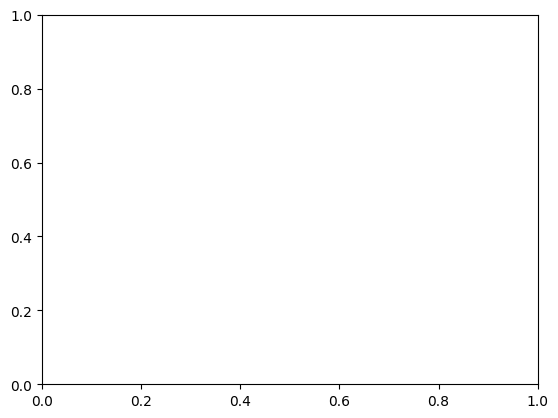

In [6]:
alpha = 1
c = 0.5
F = lambda x1, x2: np.array([[0,1],
                             [-1, alpha - alpha * c]]) @ np.array([x1, x2])

steps = 1000
x = np.zeros((steps,2))
X0 = []
NUM = 6
for a in np.linspace(-2, 2, num=NUM):
    for b in np.linspace(-2, 2, num=NUM):
        X0.append((a,b))
        
for a in np.linspace(-0.8, 0.8, num=3):
    for b in np.linspace(-0.8, 0.8, num=3):
        X0.append((a,b))
dt = 0.01

fig, ax = plt.subplots()
for x0 in X0:
    x[0] = np.array(x0)
    for i in range(1, steps):
        x[i] = F(*x[i - 1]) * dt + x[i - 1]
    l, = axs[1].plot(x[:, 0], x[:, 1], color = 'red', lw=0.5)
    # add_arrow(l, position=x[20][0])
    # add_arrow(l, position=x[60][0])
    add_arrow(l, position=x[99 * steps // 100][0])


axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_aspect('equal', adjustable='box')

# plt.savefig('s2q5b.jpeg', dpi=500)

In [7]:
fig.set_size_inches((10,10))
plt.show()

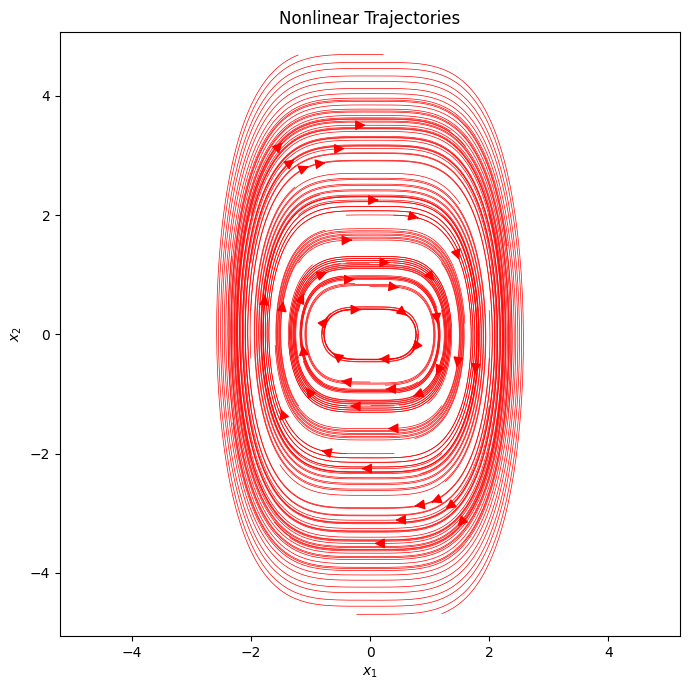

In [12]:
alpha = 1
c = 0.5
F = lambda x1, x2: np.array([x2,
                             -x1**3])

fig, ax = plt.subplots()
steps = 1000
x = np.zeros((steps,2))
X0 = []
NUM = 6
for a in np.linspace(-2, 2, num=NUM):
    for b in np.linspace(-2, 2, num=NUM):
        X0.append((a,b))

for a in np.linspace(-0.8, 0.8, num=3):
    for b in np.linspace(-0.8, 0.8, num=3):
        X0.append((a,b))
dt = 0.01


for x0 in X0:
    x[0] = np.array(x0)
    for i in range(1, steps):
        x[i] = F(*x[i - 1]) * dt + x[i - 1]
    l, = ax.plot(x[:, 0], x[:, 1], color = 'red', lw=0.5)
    # add_arrow(l, position=x[20][0])
    add_arrow(l, position=x[60][0])

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_aspect('equal', adjustable='datalim')
ax.set_title('Nonlinear Trajectories')

fig.set_size_inches((7, 7))

fig.tight_layout()
# plt.show()
plt.savefig('s3q4.jpeg', dpi=700)

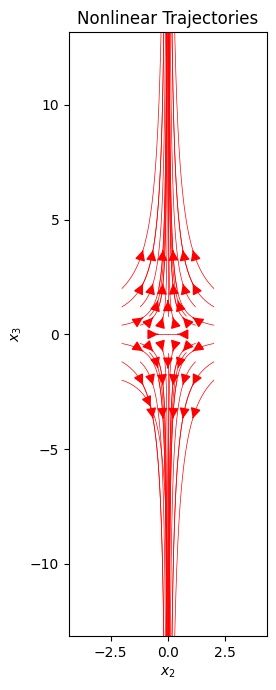

In [110]:
k = 1
F = lambda x2, x3, t: np.array([-x2 + np.exp(-k * t),
                                x3 + + np.exp(-2 * t)])

fig, ax = plt.subplots()
steps = 1000
x = np.zeros((steps,2))
X0 = []
NUM = 6
for a in np.linspace(-2, 2, num=NUM):
    for b in np.linspace(-2, 2, num=NUM):
        X0.append((a,b))

for a in np.linspace(-0.8, 0.8, num=3):
    for b in np.linspace(-0.8, 0.8, num=3):
        X0.append((a,b))
dt = 0.01

t = 0
for x0 in X0:
    x[0] = np.array(x0)
    for i in range(1, steps):
        x[i] = F(*x[i - 1], t) * dt + x[i - 1]
        t += dt
    l, = ax.plot(x[:, 0], x[:, 1], color = 'red', lw=0.5)
    # add_arrow(l, position=x[20][0])
    add_arrow(l, position=x[60][0])

ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_3$')
ax.set_xlim((-3, 3))
ax.set_ylim((-10, 10))
ax.set_aspect('equal', adjustable='datalim')
ax.set_title('Nonlinear Trajectories')

fig.set_size_inches((3, 7))

fig.tight_layout()
# plt.show()
plt.savefig('s3q1.jpeg', dpi=700)

In [79]:
A = np.array([[-1, -2],
              [-2, -1]])


In [80]:
for _ in range(1_000_000):
    x = np.random.random((2,1))
    v=x.T@A
    if not np.all(v < 0):
        print(v)
        break

In [72]:
x.T@A.T

array([[-2.2493581 , -1.79853448]])